In [1]:
import pandas as pd 
import os
from utils.preprocessing import preprocess_df
from utils.df_loader import (  load_electricity_mixed_df,
    load_eye_movements_mixed_df,
    load_covertype_mixed_df,
    load_albert_df,
    load_road_safety_df,
    load_california_df,
    load_credit_df,
    load_heloc_df,
    load_jannis_df,
    load_Diabetes130US_df,
    load_eye_movements_df,
    load_Higgs_df,
    load_default_of_credit_card_clients_df,
    load_MiniBooNE_df,
    load_bank_marketing_df,
    load_Bioresponse_df,
    load_bank_marketing_df,
    load_MagicTelescope_df,
    load_house_16H_df,
    load_pol_df,
    load_electricity_df,
    load_covertype_df,
    load_adult_df,
    load_compas_df,
    load_german_df,
    load_diabetes_df,
    load_breast_cancer_df,)
from utils.evaluation import get_evaluations, EvaluationMatrix

In [2]:
all_dataset_names = [
    "electricity_mixed", 
    "eye_movements_mixed", 
    "covertype_mixed", 
    "albert", 
    "road-safety",
    "california",
    "credit",
    "heloc",
    "jannis",
    "Diabetes130US",
    "eye_movements",
    "Higgs",
    "default-of-credit-card-clients",
    "MiniBooNE",
    "bank-marketing",
    "Bioresponse",
    "bank-marketing",
    "MagicTelescope",
    "house_16H",
    "pol",
    "covertype",
    "electricity",
    "adult",
    "german",
    "compas",
    "diabetes",
    "breast_cancer",
]

all_algorithm_names = ["dice", "GS", "proto", "watcher"]

all_models = ["dt", "rfc", "nn"]


In [3]:
def get_loading_fn(dataset_name):

    if dataset_name == "electricity_mixed":
        dataset_loading_fn = load_electricity_mixed_df
    elif dataset_name == "eye_movements_mixed":
        dataset_loading_fn = load_eye_movements_mixed_df
    elif dataset_name == "covertype_mixed":
        dataset_loading_fn = load_covertype_mixed_df
    elif dataset_name == "albert":
        dataset_loading_fn = load_albert_df
    elif dataset_name == "road-safety":
        dataset_loading_fn = load_road_safety_df
    elif dataset_name == "california":
        dataset_loading_fn = load_california_df
    elif dataset_name == "credit":
        dataset_loading_fn = load_credit_df
    elif dataset_name == "heloc":
        dataset_loading_fn = load_heloc_df
    elif dataset_name == "jannis":
        dataset_loading_fn = load_jannis_df
    elif dataset_name == "Diabetes130US":
        dataset_loading_fn = load_Diabetes130US_df
    elif dataset_name == "eye_movements":
        dataset_loading_fn = load_eye_movements_df
    elif dataset_name == "Higgs":
        dataset_loading_fn = load_Higgs_df
    elif dataset_name == "default-of-credit-card-clients":
        dataset_loading_fn = load_default_of_credit_card_clients_df
    elif dataset_name == "MiniBooNE":
        dataset_loading_fn = load_MiniBooNE_df
    elif dataset_name == "bank-marketing":
        dataset_loading_fn = load_bank_marketing_df
    elif dataset_name == "Bioresponse":
        dataset_loading_fn = load_Bioresponse_df
    elif dataset_name == "MagicTelescope":
        dataset_loading_fn = load_MagicTelescope_df
    elif dataset_name == "house_16H":
        dataset_loading_fn = load_house_16H_df
    elif dataset_name == "pol":
        dataset_loading_fn = load_pol_df
    elif dataset_name == "pol":
        dataset_loading_fn = load_pol_df
    elif dataset_name == "covertype":
        dataset_loading_fn = load_covertype_df
    elif dataset_name == "electricity":
        dataset_loading_fn = load_electricity_df
    elif dataset_name == "adult":
        dataset_loading_fn = load_adult_df
    elif dataset_name == "german":
        dataset_loading_fn = load_german_df
    elif dataset_name == "compas":
        dataset_loading_fn = load_compas_df
    elif dataset_name == "diabetes":
        dataset_loading_fn = load_diabetes_df
    elif dataset_name == "breast_cancer":
        dataset_loading_fn = load_breast_cancer_df
    else:
        raise Exception("Unsupported dataset")
    return dataset_loading_fn


In [77]:
for dataset_name in all_dataset_names:
    df_info = preprocess_df(get_loading_fn(dataset_name))
    
    # drop QueryID
    df_info.feature_names = [c for c in df_info.feature_names if c != "QueryID"]
    
    print(f"[{dataset_name}] | #Features: [{len(df_info.feature_names)}]| #Numerical: [{len(df_info.numerical_cols)}] | #Categorical: [{len( [c for c in df_info.categorical_cols if c != df_info.target_name])}] | #OHE Features: [{len(df_info.ohe_feature_names)}] |")

# Because the tree size is huge => not generating.
# one of the reason causing the huge size of tree could be the #features.

[electricity_mixed] | #Features: [8]| #Numerical: [8] | #Categorical: [0] | #OHE Features: [8] |
[eye_movements_mixed] | #Features: [23]| #Numerical: [23] | #Categorical: [0] | #OHE Features: [23] |
[covertype_mixed] | #Features: [54]| #Numerical: [54] | #Categorical: [0] | #OHE Features: [54] |
[albert] | #Features: [31]| #Numerical: [31] | #Categorical: [0] | #OHE Features: [31] |
[road-safety] | #Features: [32]| #Numerical: [32] | #Categorical: [0] | #OHE Features: [32] |
[california] | #Features: [8]| #Numerical: [8] | #Categorical: [0] | #OHE Features: [8] |
[credit] | #Features: [10]| #Numerical: [10] | #Categorical: [0] | #OHE Features: [10] |
[heloc] | #Features: [22]| #Numerical: [22] | #Categorical: [0] | #OHE Features: [22] |
[jannis] | #Features: [54]| #Numerical: [54] | #Categorical: [0] | #OHE Features: [54] |
[Diabetes130US] | #Features: [7]| #Numerical: [7] | #Categorical: [0] | #OHE Features: [7] |
[eye_movements] | #Features: [20]| #Numerical: [20] | #Categorical: [0]

In [86]:
#### Select dataset ####
dataset_name = "breast_cancer" # [adult, german, compas, breast_cancer, diabetes]
# cf_algorithm= 'proto' # ["dice", "GS", "proto", "watcher"]
# model_name = 'dt' # ["dt", "rfc", "nn"]

for dataset_name in ["road-safety"]:
    df_info = preprocess_df(get_loading_fn(dataset_name))
    for cf_algorithm in all_algorithm_names:
        folder_name = f'{cf_algorithm}_{dataset_name}'
        for model_name in all_models:
            file_name = f'{folder_name}_{model_name}_result.csv'
            result_path = f'./results/{folder_name}/{file_name}'
            if  os.path.isfile(result_path):
                print("here")
                result_df = pd.read_csv(result_path)
                evaluation_df = get_evaluations(result_df, df_info, matrix = [EvaluationMatrix.L1, EvaluationMatrix.L2, EvaluationMatrix.Sparsity, EvaluationMatrix.Realistic, EvaluationMatrix.MAD, EvaluationMatrix.Mahalanobis])

                csv_save_result_path = f'results/{folder_name}/eval_{file_name}'
                evaluation_df.to_csv(csv_save_result_path)
                print(f"Have saved file to {csv_save_result_path}")
            else:
                print(f"File {result_path} not found")
    break


here
Have saved file to results/dice_road-safety/eval_dice_road-safety_dt_result.csv
here
Have saved file to results/dice_road-safety/eval_dice_road-safety_rfc_result.csv
here
Have saved file to results/dice_road-safety/eval_dice_road-safety_nn_result.csv
File ./results/GS_road-safety/GS_road-safety_dt_result.csv not found
File ./results/GS_road-safety/GS_road-safety_rfc_result.csv not found
File ./results/GS_road-safety/GS_road-safety_nn_result.csv not found
here


/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  return self.scaled_df[self.numerical_cols].mad().to_dict()
/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  return self.scaled_df[self.numerical_cols].mad().to_dict()
/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  return self.scaled_df[self.numerical_cols].mad().to_dict()
/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: Futu

Have saved file to results/proto_road-safety/eval_proto_road-safety_dt_result.csv
here
Have saved file to results/proto_road-safety/eval_proto_road-safety_rfc_result.csv
here
Have saved file to results/proto_road-safety/eval_proto_road-safety_nn_result.csv
File ./results/watcher_road-safety/watcher_road-safety_dt_result.csv not found
File ./results/watcher_road-safety/watcher_road-safety_rfc_result.csv not found
File ./results/watcher_road-safety/watcher_road-safety_nn_result.csv not found


/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  return self.scaled_df[self.numerical_cols].mad().to_dict()
/Users/162191/Documents/GitHub/Counterfactual-benchmark/utils/preprocessing.py:229: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  return self.scaled_df[self.numerical_cols].mad().to_dict()


In [7]:
# To compute the coverage of the results, we'll define a function that calculates the proportion of times
# a counterfactual explanation was found ("Found" column with value 'Y') for each query, averaged over
# the number of executions (5 times for each query).

def calculate_coverage(data):
    # Group by QueryID and count how many times a counterfactual was found for each QueryID
    found_counterfactuals = data.groupby('QueryID')['Found'].apply(lambda x: (x == 'Y').sum()).reset_index(name='Found_Count')
    
    # Since each counterfactual XAI algorithm was executed 5 times for each query, we divide the count by 5
    # to get the coverage
    found_counterfactuals['Coverage'] = found_counterfactuals['Found_Count'] / 5
    
    return found_counterfactuals

coverage_results = calculate_coverage(result_df)
coverage_results


,QueryID,Found_Count,Coverage
0,1,1,0.2
1,2,1,0.2
2,3,1,0.2
3,4,1,0.2
4,5,1,0.2
...,...,...,...
95,96,0,0.0
96,97,0,0.0
97,98,0,0.0
98,99,0,0.0


In [46]:
# aggregate results
import numpy as np

dataset_name = "albert"


cfs = [  "dice",  "proto"]



model_name = ["DECISION TREE", "RANDOM FOREST", "NEURAL NET"]
orginal_features = []


for cf_algorithm in cfs:
    INDX = 0

    print(cf_algorithm)
    
    folder_path = f'./results/{cf_algorithm}_{dataset_name}/eval_'

    dt_results = folder_path + f'{cf_algorithm}_{dataset_name}_dt_result.csv'
    nn_results = folder_path + f'{cf_algorithm}_{dataset_name}_nn_result.csv'
    rfc_results = folder_path + f'{cf_algorithm}_{dataset_name}_rfc_result.csv'

    results = [ dt_results, rfc_results, nn_results]
    #results = [ rfc_results, nn_results]
    
    for result in results:
        orginal_features = []
        model = model_name[INDX]
        
        print(result)
        result_df = pd.read_csv(result)

        columns = list( result_df.columns )
        for c  in columns:
            if "scaled_input" in c:
                orginal_features.append(c)
        
        
        # if there is no column QueryID, then add it and set to [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 ...]
        if 'QueryID' not in result_df.columns:
            result_df['QueryID'] = np.repeat(np.arange(1, len(result_df) / 5 + 1), 5)
            #result_df['QueryID'] = np.repeat(np.arange(1, len(result_df) + 1), 1)
            
        print(model)
        print(f"Total number of features: {len(orginal_features)}")
        result_df['Sparsity_Rate'] = result_df['Sparsity'] / len(orginal_features)
        aggregated_results = result_df.groupby('QueryID').agg({
        'L1': 'mean',
        'L2': 'mean',
        'MAD': 'mean',
        'Mahalanobis': 'mean',
        'Sparsity': 'mean',
        'Sparsity_Rate' : 'mean',
        'running_time': 'mean',
    }).reset_index()
        
        aggregated_results['Coverage'] = calculate_coverage(result_df)['Coverage']
        
        
        aggregated_results.drop('QueryID', axis=1, inplace=True)
        
        res = np.round(aggregated_results.mean(),2)
        
        # convert the results to s string where eqach value is separated by a tab
        res = "\t".join([str(x) for x in res])
        print(res)
        

        print("\n")
        print("\n")
        
        INDX = INDX + 1




dice
./results/dice_albert/eval_dice_albert_dt_result.csv
DECISION TREE
Total number of features: 32
0.76	0.62	2.47	0.04	1.54	0.05	0.04	0.65




./results/dice_albert/eval_dice_albert_rfc_result.csv
RANDOM FOREST
Total number of features: 32
1.13	0.82	5.53	0.05	2.12	0.07	0.05	0.75




./results/dice_albert/eval_dice_albert_nn_result.csv
NEURAL NET
Total number of features: 32
0.84	0.71	2.76	0.06	1.66	0.05	0.04	0.65




proto
./results/proto_albert/eval_proto_albert_dt_result.csv
DECISION TREE
Total number of features: 32
3.67	1.37	1.15	0.34	23.79	0.74	23.73	0.45




./results/proto_albert/eval_proto_albert_rfc_result.csv
RANDOM FOREST
Total number of features: 32
3.62	1.38	1.07	0.34	24.06	0.75	124.83	0.55




./results/proto_albert/eval_proto_albert_nn_result.csv
NEURAL NET
Total number of features: 32
3.59	1.27	1.33	0.3	23.75	0.74	29.77	0.5






QueryID          10.500000
L1                0.763457
L2                0.641960
MAD              24.945923
Mahalanobis       0.073409
Sparsity          1.662500
Sparsity_Rate     0.069271
running_time      0.013729
Coverage          0.800000
dtype: float64


In [13]:
orginal_features

['origin_input_date',
 'origin_input_period',
 'origin_input_nswprice',
 'origin_input_nswdemand',
 'origin_input_vicprice',
 'origin_input_vicdemand',
 'origin_input_transfer',
 'origin_input_target']

In [8]:
result_df

,QueryID,scaled_input_date,scaled_input_period,scaled_input_nswprice,scaled_input_nswdemand,scaled_input_vicprice,scaled_input_vicdemand,scaled_input_transfer,scaled_input_target,origin_input_date,...,running_time,Found,ground_truth,prediction,L1,L2,Sparsity,Realistic,MAD,Mahalanobis
0,1,0.460865,0.723404,0.142074,0.606665,0.009412,0.438374,0.426612,1,0.460865,...,0.045251,Y,1,Y,0.552714,0.552714,1.0,True,0.605681,0.089295
1,1,0.460865,0.723404,0.142074,0.606665,0.009412,0.438374,0.426612,1,0.460865,...,0.009902,Y,1,Y,0.609746,0.434875,2.0,True,0.512265,0.108980
2,1,0.460865,0.723404,0.142074,0.606665,0.009412,0.438374,0.426612,1,0.460865,...,0.010021,Y,1,Y,0.716980,0.516367,2.0,True,2.912881,0.034211
3,1,0.460865,0.723404,0.142074,0.606665,0.009412,0.438374,0.426612,1,0.460865,...,0.009673,Y,1,Y,0.145248,0.106790,2.0,True,0.191640,0.021679
4,1,0.460865,0.723404,0.142074,0.606665,0.009412,0.438374,0.426612,1,0.460865,...,0.009939,Y,1,Y,0.642124,0.454751,2.0,True,2.072842,0.060090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,0.474271,0.042553,0.025455,0.091044,0.001635,0.182030,0.777320,0,0.474271,...,0.009580,Y,0,N,0.870317,0.615440,2.0,True,0.731522,0.149119
96,20,0.474271,0.042553,0.025455,0.091044,0.001635,0.182030,0.777320,0,0.474271,...,0.009371,Y,0,N,0.715199,0.715199,1.0,True,0.788832,0.113249
97,20,0.474271,0.042553,0.025455,0.091044,0.001635,0.182030,0.777320,0,0.474271,...,0.009483,Y,0,N,1.031740,0.743636,2.0,True,0.918379,0.162500
98,20,0.474271,0.042553,0.025455,0.091044,0.001635,0.182030,0.777320,0,0.474271,...,0.009511,Y,0,N,0.774016,0.774016,1.0,True,0.853704,0.122563


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the results per ML model and per dataset for L1 norm and L2 norm
def plot_norms(dataframe, norm_type):
    plt.figure(figsize=(20, 15))
    
    # Get a list of models
    models = dataframe['Model'].unique()
    
    # Create a subplot for each model
    for i, model in enumerate(models, 1):
        plt.subplot(1, len(models), i)
        model_df = dataframe[dataframe['Model'] == model]
        sns.barplot(x=norm_type, y='Dataset', hue='Counterfactual', data=model_df.sort_values(norm_type))
        plt.title(f'{model} - {norm_type}')
        plt.xlabel(norm_type)
        plt.ylabel('Dataset')
        plt.legend(loc='upper right')
        # increase the font size
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    
    plt.tight_layout()
    plt.show()




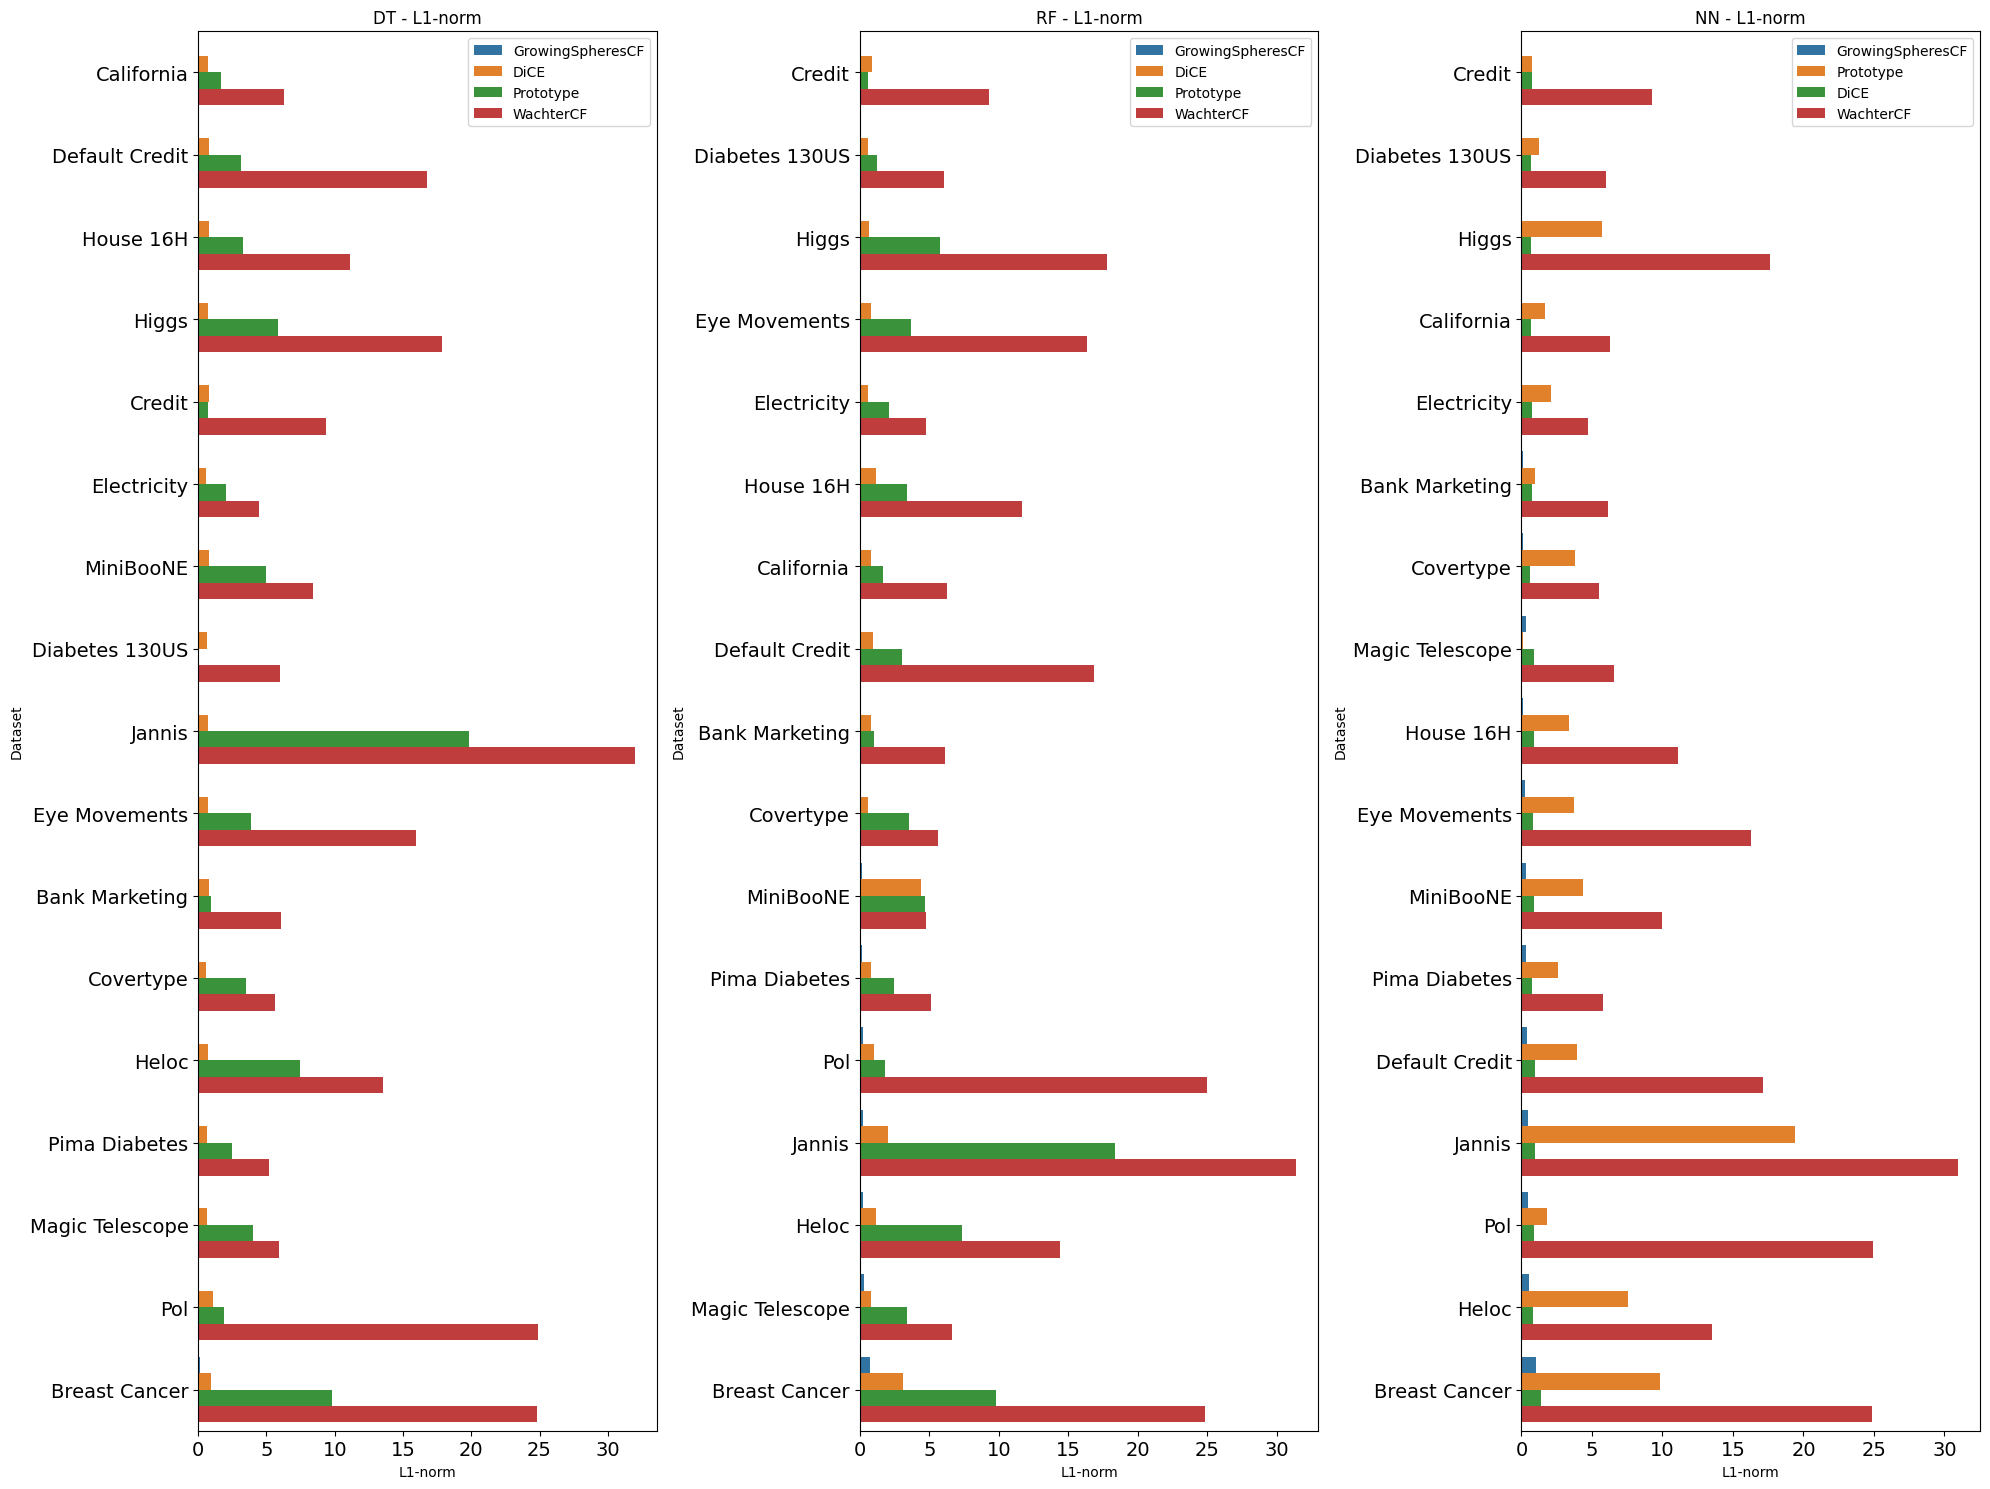

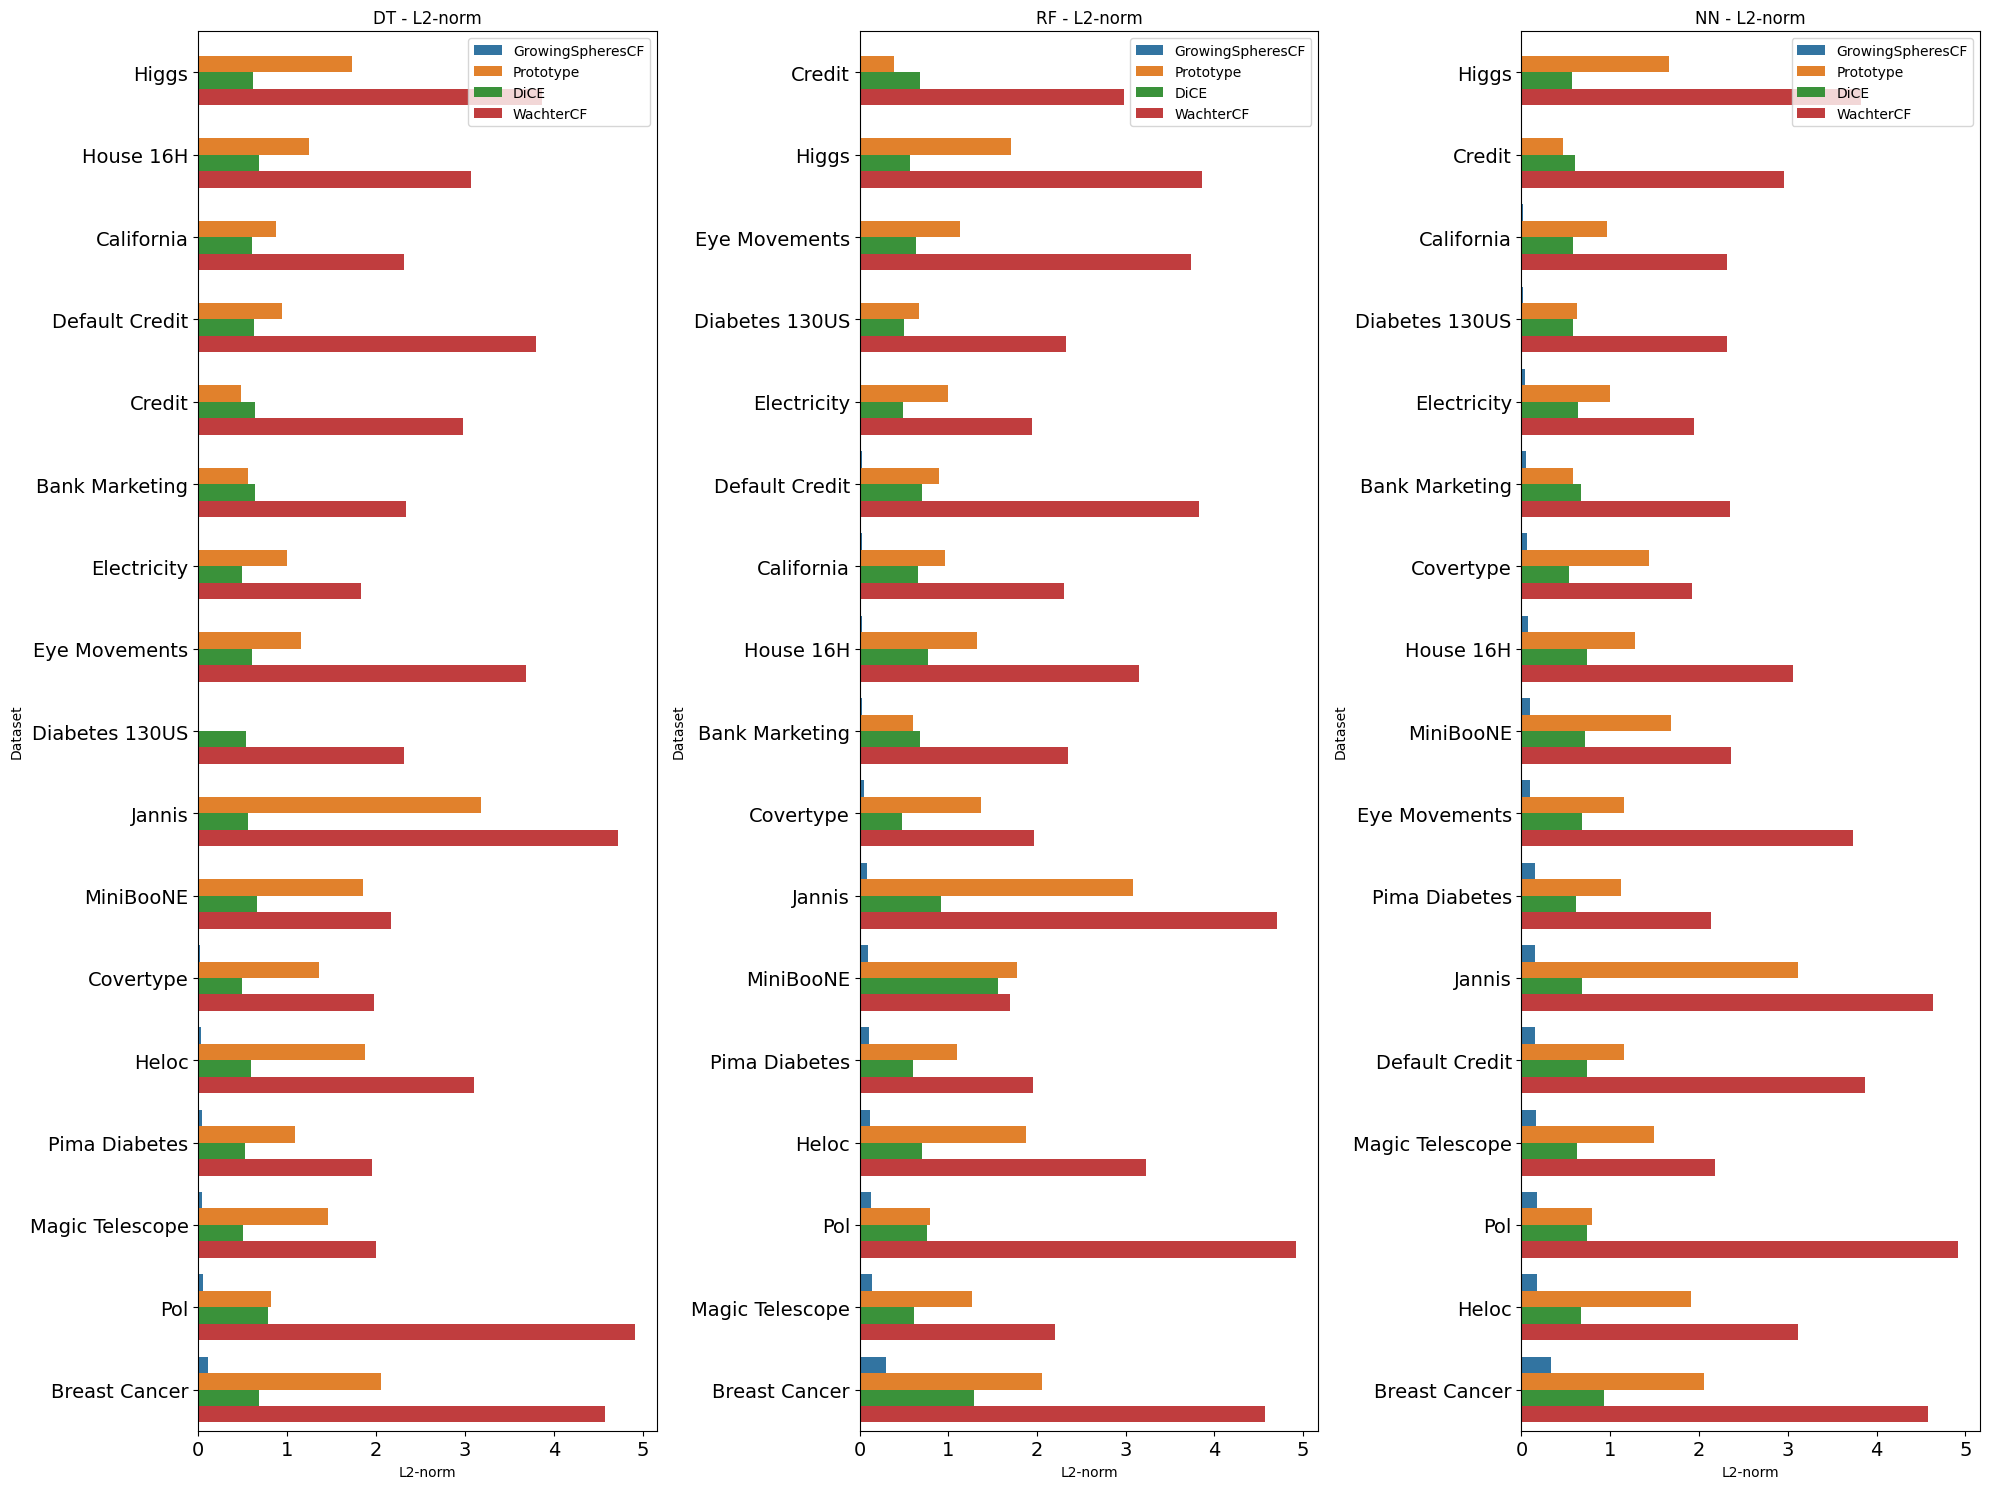

In [95]:
import pandas as pd
df = pd.read_excel('results.xlsx')

# Since the provided Excel file may have multiple sheets or specific formatting,
# let's check the content of the dataframe to see how to properly read it for visualization.
df.head()

# Plot for L1-norm
plot_norms(df, 'L1-norm')

# Plot for L2-norm
plot_norms(df, 'L2-norm')

In [96]:
df['L1-norm'] = df['L1-norm'].apply(lambda x: np.log(x + 1))
df['L2-norm'] = df['L2-norm'].apply(lambda x: np.log(x + 1))

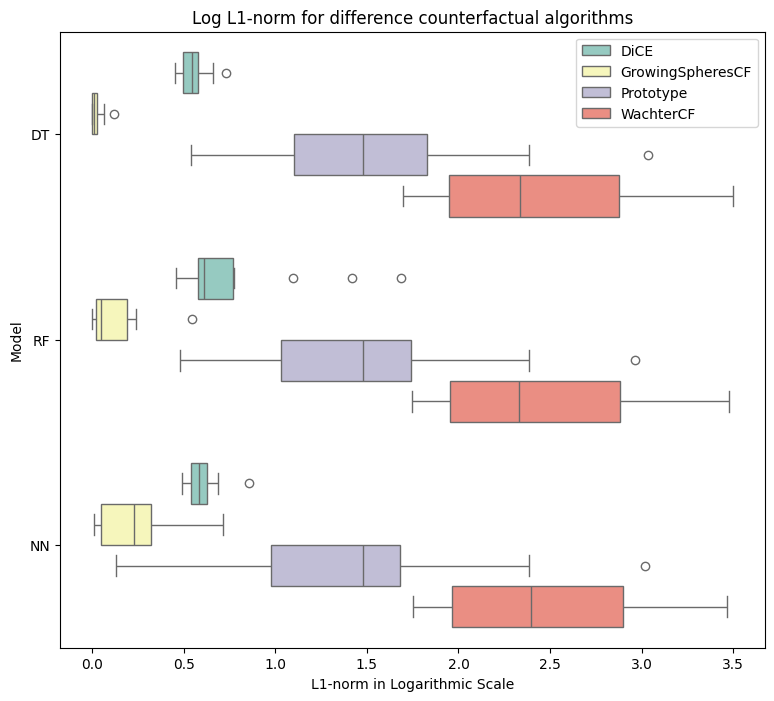

In [97]:

# make box plot
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='L1-norm',y='Model', data=df, hue='Counterfactual', palette="Set3")
plt.title('Log L1-norm for difference counterfactual algorithms')
plt.xlabel('L1-norm in Logarithmic Scale')
plt.ylabel('Model')
plt.legend(loc='upper right')


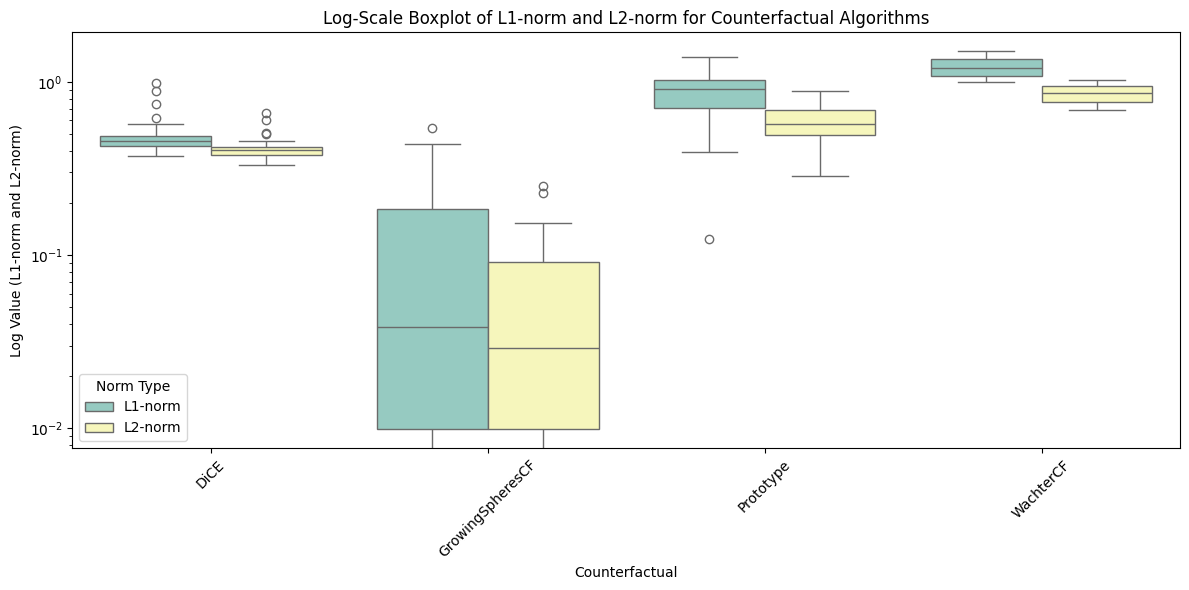

In [98]:
# Apply log transformation to L1-norm and L2-norm values to handle wide ranges and improve visualization
# Add 1 to L1-norm and L2-norm values before taking log to avoid -inf for zero values.
df['L1-norm'] = df['L1-norm'].apply(lambda x: np.log(x + 1))
df['L2-norm'] = df['L2-norm'].apply(lambda x: np.log(x + 1))

# Melt the dataframe to have 'Norm Type' and 'Value' columns
df_long = pd.melt(df, id_vars=['Dataset', 'Model', 'Counterfactual'], value_vars=['L1-norm', 'L2-norm'],
                  var_name='Norm Type', value_name='Log Value')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Counterfactual', y='Log Value', hue='Norm Type', palette="Set3")
plt.title('Log-Scale Boxplot of L1-norm and L2-norm for Counterfactual Algorithms')
plt.yscale('log')
plt.ylabel('Log Value (L1-norm and L2-norm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
df

,Dataset,Model,Counterfactual,L1-norm,L2-norm
0,Breast Cancer,DT,DiCE,0.508436,0.417916
1,Breast Cancer,DT,GrowingSpheresCF,0.115307,0.099266
2,Breast Cancer,DT,Prototype,1.218562,0.750668
3,Breast Cancer,DT,WachterCF,1.447372,1.000334
4,Breast Cancer,RF,DiCE,0.883055,0.603524
...,...,...,...,...,...
198,California,RF,WachterCF,1.093183,0.787069
199,California,NN,DiCE,0.417916,0.376671
200,California,NN,GrowingSpheresCF,0.038471,0.019609
201,California,NN,Prototype,0.680345,0.514585


In [100]:
df_long

,Dataset,Model,Counterfactual,Norm Type,Log Value
0,Breast Cancer,DT,DiCE,L1-norm,0.508436
1,Breast Cancer,DT,GrowingSpheresCF,L1-norm,0.115307
2,Breast Cancer,DT,Prototype,L1-norm,1.218562
3,Breast Cancer,DT,WachterCF,L1-norm,1.447372
4,Breast Cancer,RF,DiCE,L1-norm,0.883055
...,...,...,...,...,...
401,California,RF,WachterCF,L2-norm,0.787069
402,California,NN,DiCE,L2-norm,0.376671
403,California,NN,GrowingSpheresCF,L2-norm,0.019609
404,California,NN,Prototype,L2-norm,0.514585


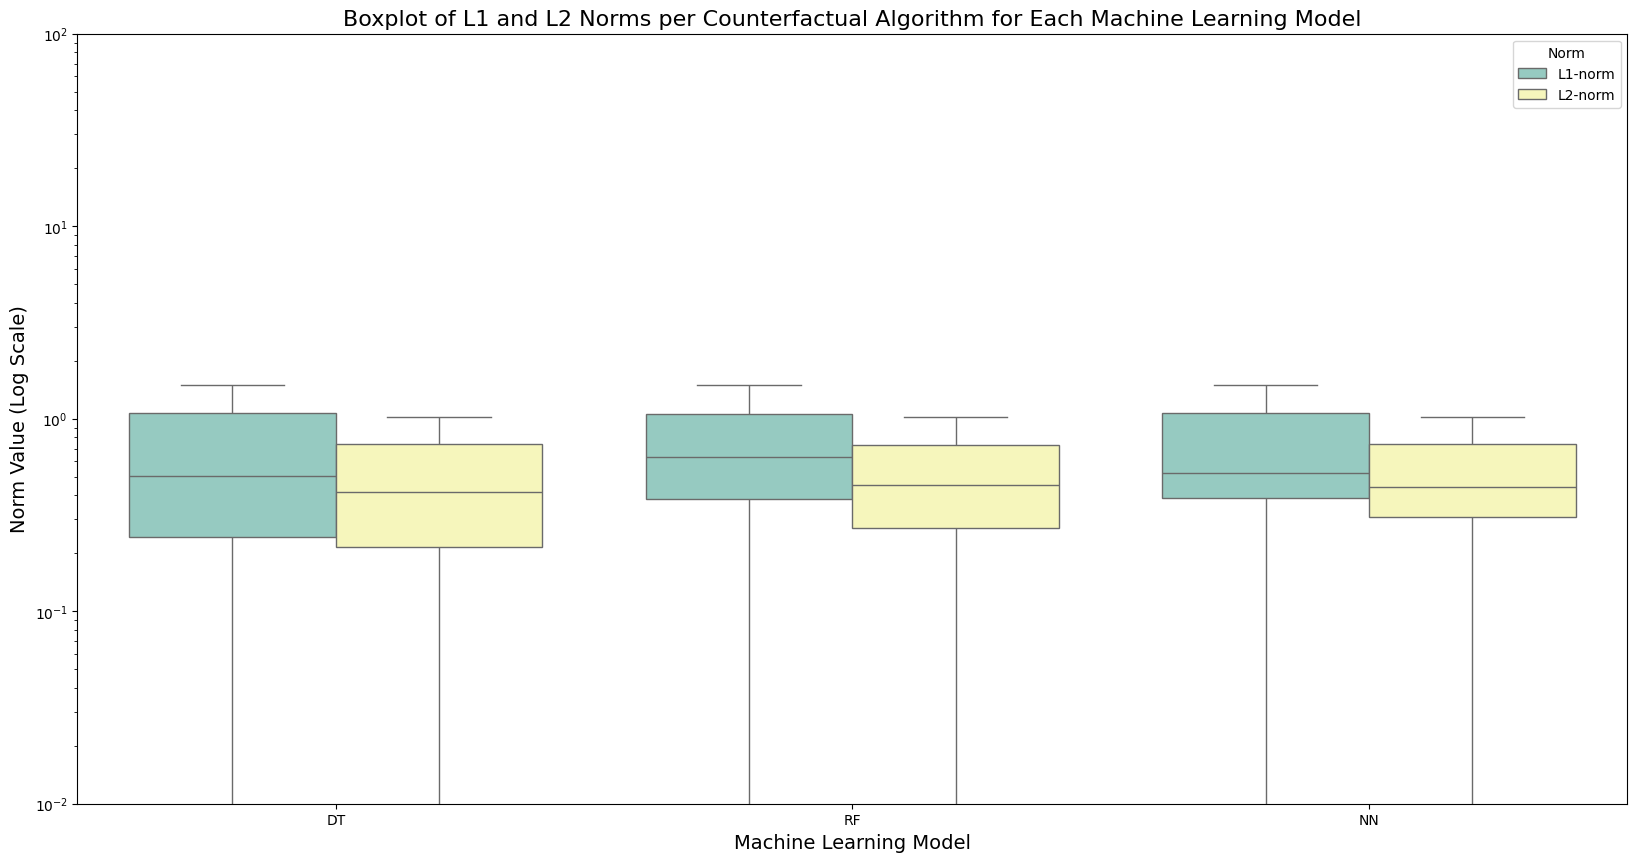

In [101]:
plt.figure(figsize=(20, 10))

# Combining the data for L1 and L2 norms into a single DataFrame with a new column to distinguish between the norms.
df_combined = df_long.copy()
df_combined['Norm'] = df_combined['Norm Type'].apply(lambda x: 'L1' if 'L1' in x else 'L2')
df_combined['Metric'] = df_combined['Norm Type'].str.replace(' L1-norm', '').str.replace(' L2-norm', '')

# Plotting
sns.boxplot(data=df_combined, x='Model', y='Log Value', hue='Metric', palette='Set3', dodge=True)

plt.yscale('log')
plt.ylim(1e-2, 1e2) # Adjusting the y-axis to show values in log scale
plt.title('Boxplot of L1 and L2 Norms per Counterfactual Algorithm for Each Machine Learning Model', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=14)
plt.ylabel('Norm Value (Log Scale)', fontsize=14)
plt.legend(title='Norm')

plt.show()

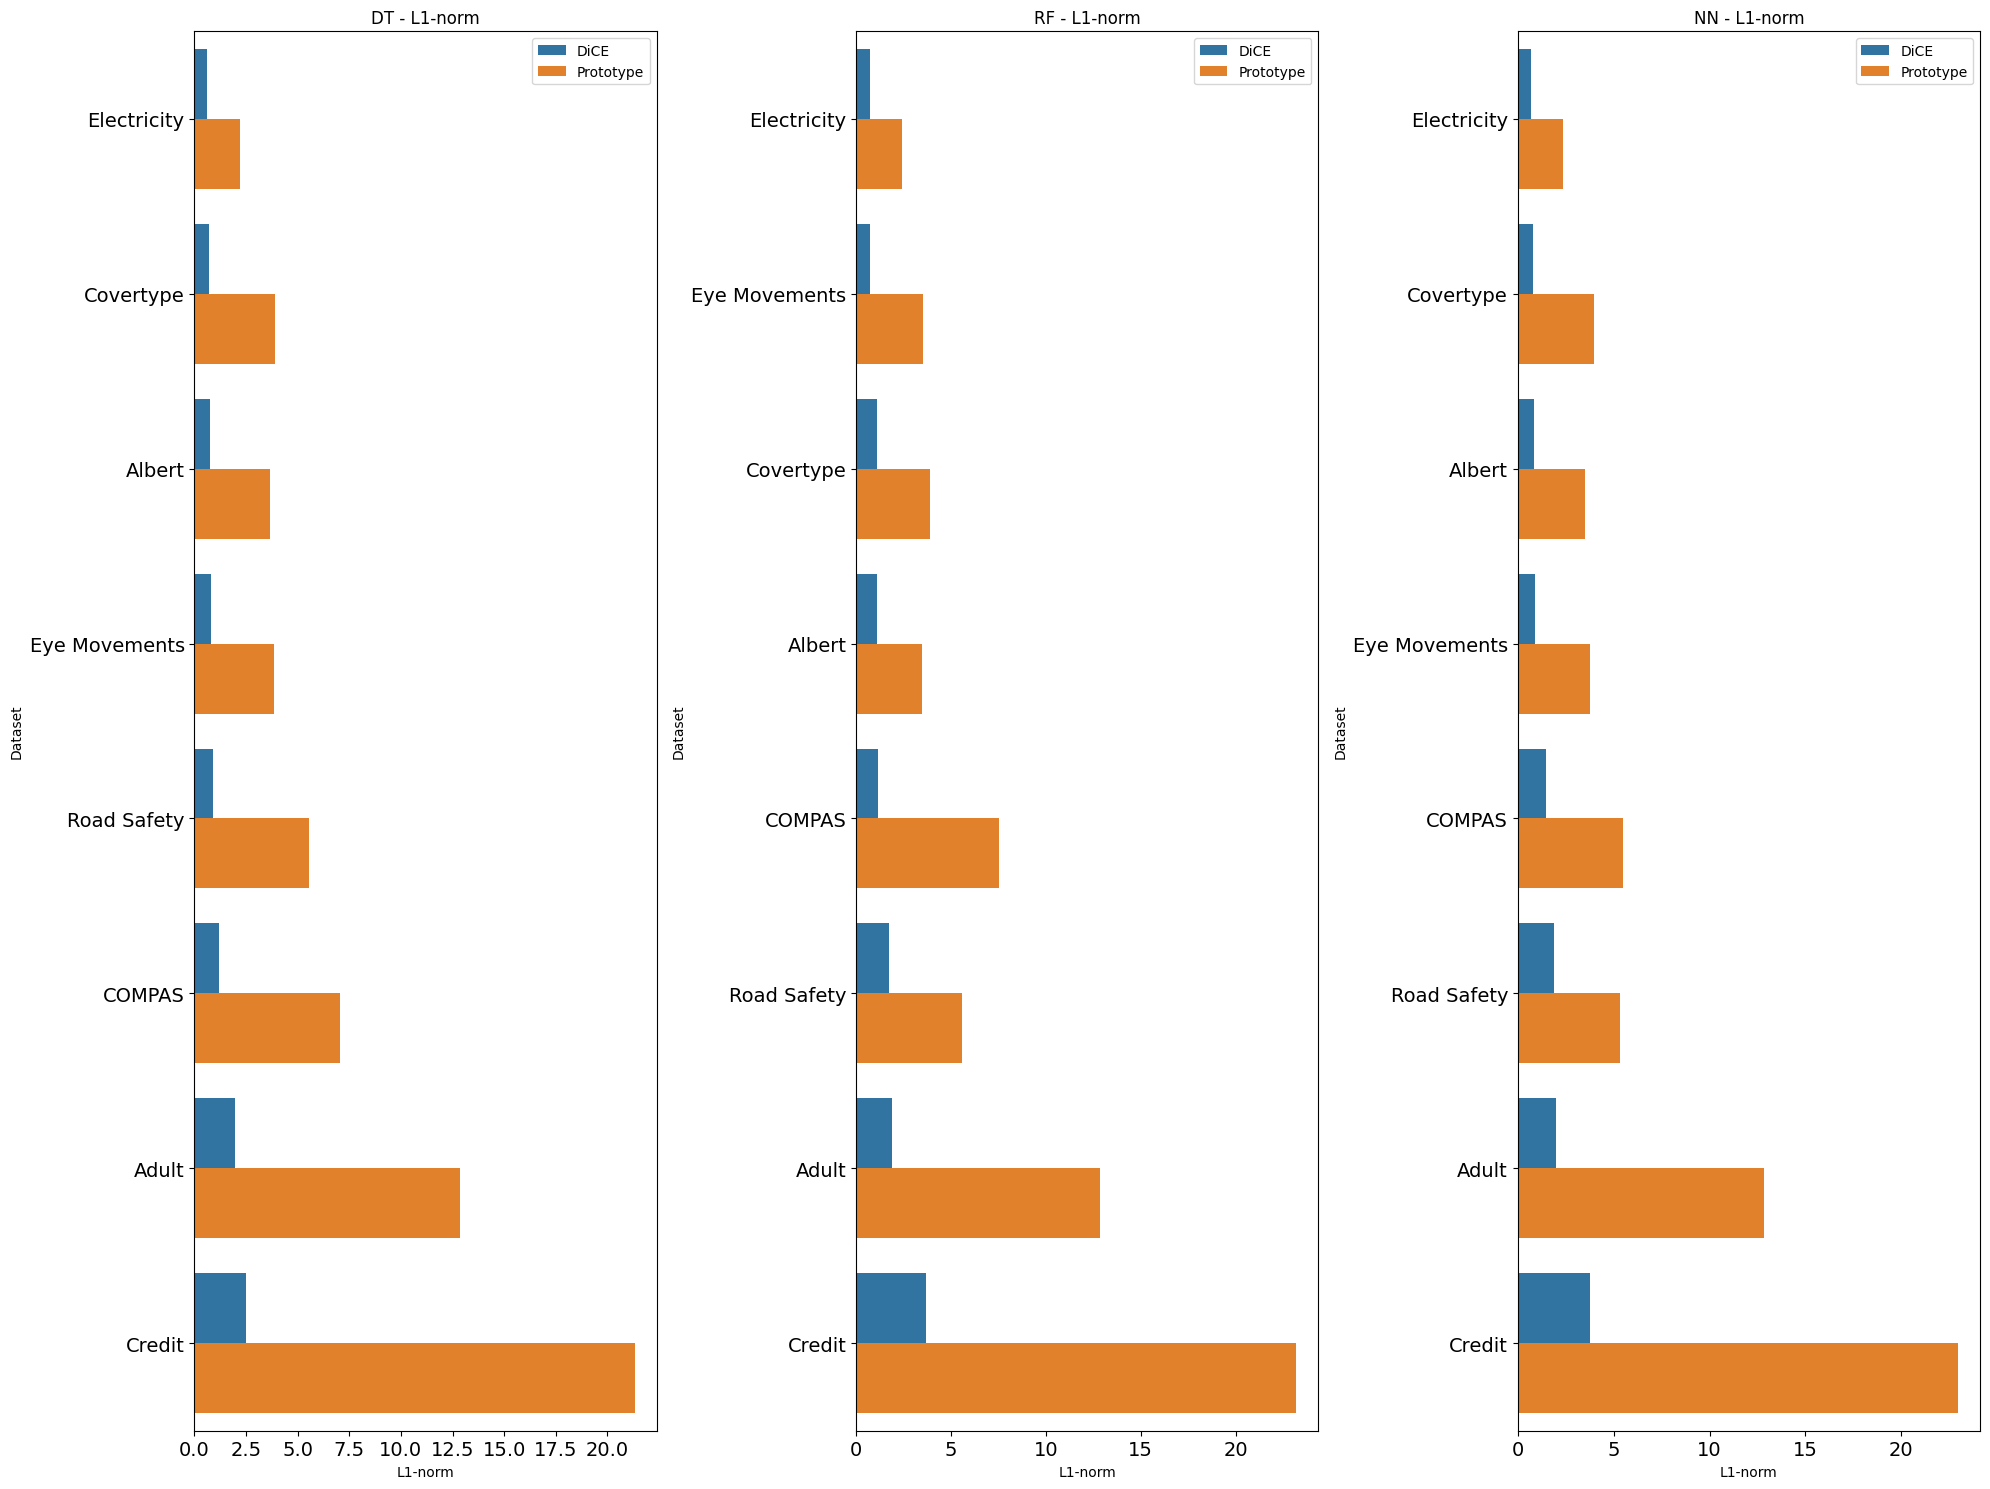

In [102]:
import pandas as pd
df = pd.read_excel('results_mixed.xlsx')

# Since the provided Excel file may have multiple sheets or specific formatting,
# let's check the content of the dataframe to see how to properly read it for visualization.
df.head()

# Plot for L1-norm
plot_norms(df, 'L1-norm')


In [90]:
def box_plot_norms(dataframe, norm_type):
    plt.figure(figsize=(20, 15))
    
    # make the log of the norm
    dataframe[norm_type] = dataframe[norm_type].apply(lambda x: np.log(x + 1))
    
    # aggregate by model
    df_agg = dataframe.groupby(['Model', 'Counterfactual', 'Dataset'])[norm_type].mean().reset_index()
    
    sns.boxplot(x=norm_type, y='Dataset', hue='Counterfactual', data=df_agg, palette="Set3")
    plt.title(f'Average Log {norm_type} Across All ML Models')
    plt.xlabel(norm_type)
    plt.ylabel('Dataset')
    plt.legend(loc='upper right')
    # increase the font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

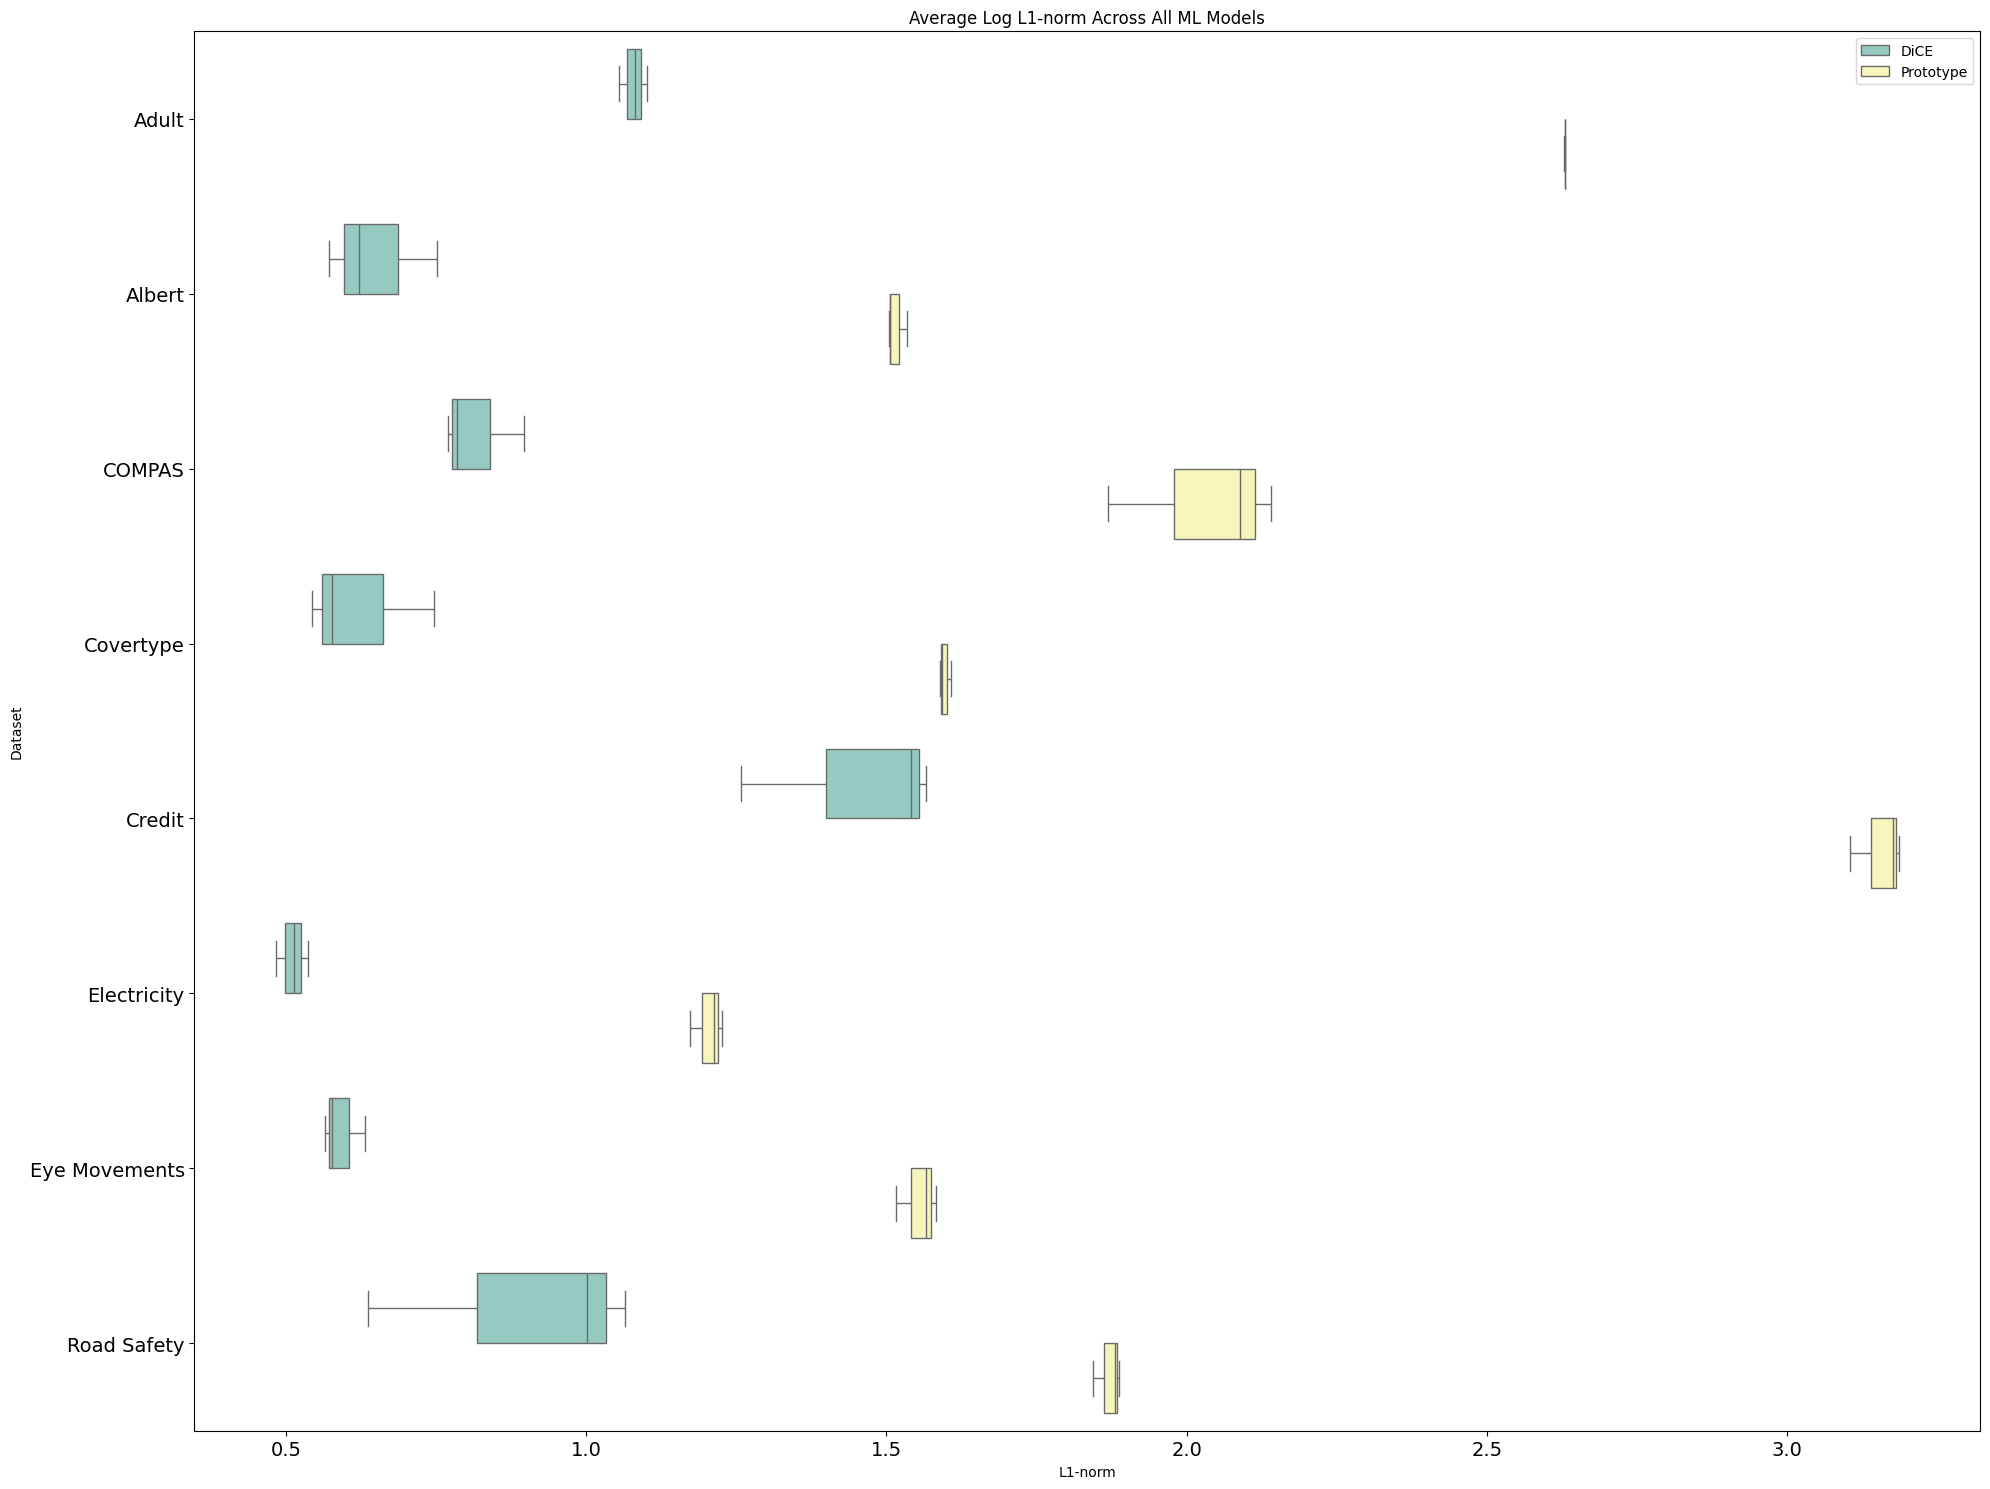

In [103]:
box_plot_norms(df, 'L1-norm')


In [158]:
# create a column called 'rev2' which is 'ohe' if the datasets are "Adult", "COMPAS" or 'Credit' and 'be_oe' ohtherwise


,Dataset,Num Features,Cat Features,Encoded Features,Model,Counterfactual,L1-norm,Spa,SpaRate,rev2
0,Adult,4,8,103,DT,DiCE,1.95,1.71,0.14,ohe
1,Adult,4,8,103,DT,Prototype,12.88,8.40,0.70,ohe
2,Adult,4,8,103,RF,DiCE,1.87,1.74,0.15,ohe
3,Adult,4,8,103,RF,Prototype,12.88,8.40,0.70,ohe
4,Adult,4,8,103,NN,DiCE,2.01,1.65,0.14,ohe
5,Adult,4,8,103,NN,Prototype,12.86,8.40,0.70,ohe
6,COMPAS,4,7,23,DT,DiCE,1.19,1.37,0.12,ohe
7,COMPAS,4,7,23,DT,Prototype,7.07,6.50,0.59,ohe
8,COMPAS,4,7,23,RF,DiCE,1.16,1.52,0.14,ohe
9,COMPAS,4,7,23,RF,Prototype,7.51,7.00,0.64,ohe


In [162]:
#df['L1-norm'] = df['L1-norm'].apply(lambda x: np.log(x + 1))
    
df = pd.read_excel('results_mixed.xlsx')

df['rev2'] = df['Dataset'].apply(lambda x: 'ohe' if x in ["Adult", "COMPAS", "Credit"] else 'be_oe')

# aggregate by model
df_agg = df.groupby(['Model', 'Encoded Features', 'Counterfactual', 'Dataset', 'rev2'])['L1-norm'].mean().reset_index()
df_agg

,Model,Encoded Features,Counterfactual,Dataset,rev2,L1-norm
0,DT,1,DiCE,Electricity,be_oe,0.62
1,DT,1,Prototype,Electricity,be_oe,2.23
2,DT,3,DiCE,Eye Movements,be_oe,0.78
3,DT,3,DiCE,Road Safety,be_oe,0.89
4,DT,3,Prototype,Eye Movements,be_oe,3.87
5,DT,3,Prototype,Road Safety,be_oe,5.56
6,DT,10,DiCE,Albert,be_oe,0.77
7,DT,10,Prototype,Albert,be_oe,3.64
8,DT,23,DiCE,COMPAS,ohe,1.19
9,DT,23,Prototype,COMPAS,ohe,7.07


<Figure size 1500x1000 with 0 Axes>

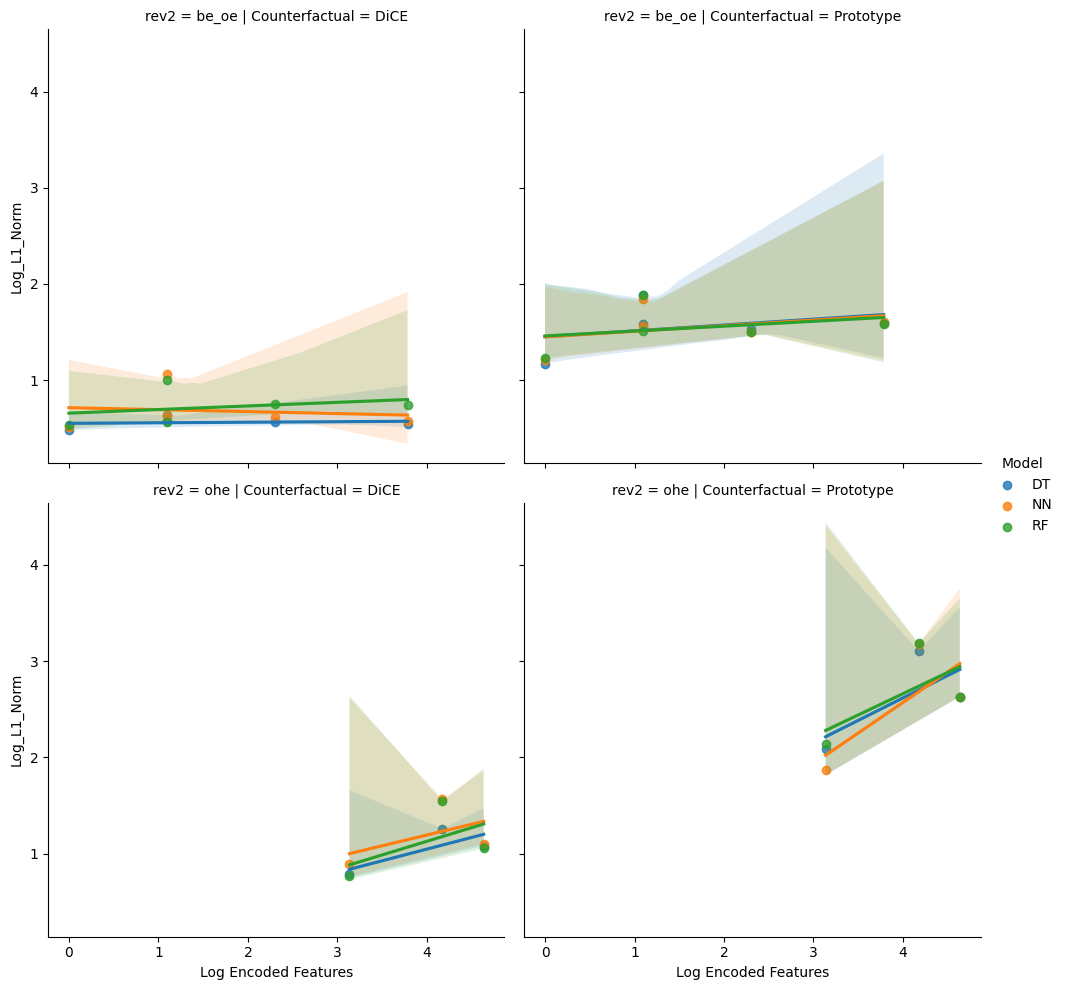

In [170]:
# linear regression between the number of encoded features and the L1-norm
import seaborn as sns

df_agg['Log_L1_Norm'] = df_agg['L1-norm'].apply(lambda x: np.log(x + 1))
df_agg['Log Encoded Features'] = df_agg['Encoded Features'].apply(lambda x: np.log(x))

plt.figure(figsize=(15, 10))
sns.lmplot(x='Log Encoded Features', y='Log_L1_Norm', data=df_agg, col='Counterfactual', hue="Model", row='rev2')

plt.show()


In [145]:
# linear regression between the number of encoded features and the L1-norm
import seaborn as sns

df_agg['Log_L1_Norm'] = df_agg['L1-norm'].apply(lambda x: np.log(x + 1))
df_agg['Log Encoded Features'] = df_agg['Encoded Features'].apply(lambda x: np.log(x))

plt.figure(figsize=(20, 15))
sns.lmplot(x='Log Encoded Features', y='Log_L1_Norm', data=df_agg, col='Counterfactual', hue="Model", row='rev2')

plt.show()


Index(['Dataset', 'Num Features', 'Cat Features', 'Encoded Features', 'Model',
       'Counterfactual', 'L1-norm', 'Spa', 'SpaRate'],
      dtype='object')

<Figure size 2000x1500 with 0 Axes>

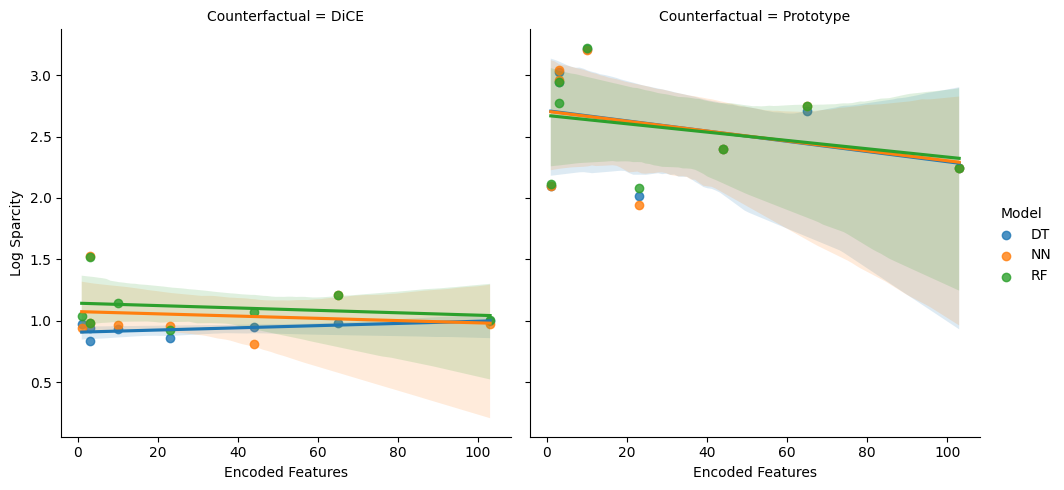

In [156]:
# linear regression between the number of encoded features and the L1-norm
import seaborn as sns

# aggregate by model
df_agg = df.groupby(['Model', 'Encoded Features', 'Counterfactual', 'Dataset'])['Spa'].mean().reset_index()
df_agg

# rename Spa as Sparcity
df_agg.rename(columns={'Spa': 'Sparcity'}, inplace=True)

df_agg['Log Sparcity'] = df_agg['Sparcity'].apply(lambda x: np.log(x + 1))
df_agg['Log Encoded Features'] = df_agg['Encoded Features'].apply(lambda x: np.log(x))

plt.figure(figsize=(20, 15))
sns.lmplot(x='Encoded Features', y='Log Sparcity', data=df_agg, col='Counterfactual', hue="Model", col_wrap=2)

plt.show()
